In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [102]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 18,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [103]:
plot_colors = {"dnn_mobile":"#344FE9","coted_mobile":"#AFC110", "trans": "#1BC266", "coted_edge":"#E89923", "dnn_edge":"#9736F1"}

In [104]:
local_df = pd.read_csv("../measurements/local_long/map.csv")


mtl_cha_df = pd.read_csv("../measurements/real_bw_test/characteristic.csv")
mtl_time_df = pd.read_csv("../measurements/real_bw_test/time.csv")

ltl_cha_df = pd.read_csv("../measurements/real_bw_test_15fps/characteristic.csv")
ltl_time_df = pd.read_csv("../measurements/real_bw_test_15fps/time.csv")

mtlhl_cha_df = pd.read_csv("../measurements/real_bw_no_jpeg/characteristic.csv")
mtlhl_time_df = pd.read_csv("../measurements/real_bw_no_jpeg/time.csv")

htllm_cha_df = pd.read_csv("../measurements_large/test_mtlhq_5_500/characteristic.csv")
htllm_time_df = pd.read_csv("../measurements_large/test_mtlhq_5_500/time.csv")


In [105]:
cal_time = []
for i in range(len(mtlhl_time_df)):
    if mtlhl_time_df["technique"][i] == 2:
        cal_time.append(mtlhl_time_df["compression_time"][i]/32)
    else:
        cal_time.append(mtlhl_time_df["compression_time"][i])
mtlhl_time_df["compression_time"] = cal_time

cal_time = []
for i in range(len(mtlhl_time_df)):
    if mtlhl_time_df["technique"][i] == 3:
        cal_time.append(mtlhl_time_df["compression_time"][i]-50)
    else:
        cal_time.append(mtlhl_time_df["compression_time"][i])
mtlhl_time_df["compression_time"] = cal_time

cal_time = []
for i in range(len(mtl_time_df)):
    if mtl_time_df["technique"][i] == 3:
        cal_time.append(mtl_time_df["compression_time"][i]-50)
    else:
        cal_time.append(mtl_time_df["compression_time"][i])
mtl_time_df["compression_time"] = cal_time

In [106]:
tiny_trans_df = 128*26*26*8/mtl_cha_df["bandwidth"]*1000
full_trans_df = 128*104*104*8/htllm_cha_df["bandwidth"]*1000

mtl_time_df["transmission_time"] = mtl_cha_df["datasize_est"]*8/mtl_cha_df["consumed_bw"]*1000
mtl_time_df["overall_est"] = mtl_time_df["model_head_time"]*10+mtl_time_df["model_tail_time"]+mtl_time_df["framework_head_time"]+mtl_time_df["framework_tail_time"] + mtl_time_df["compression_time"]+mtl_time_df["decompression_time"]+ mtl_time_df["transmission_time"]

ltl_time_df["transmission_time"] = ltl_cha_df["datasize_est"]*8/ltl_cha_df["consumed_bw"]*1000
ltl_time_df["overall_est"] = ltl_time_df["model_head_time"]*10+ltl_time_df["model_tail_time"]+ltl_time_df["framework_head_time"]+ltl_time_df["framework_tail_time"] + ltl_time_df["compression_time"]+ltl_time_df["decompression_time"]+ ltl_time_df["transmission_time"]

mtlhl_time_df["transmission_time"] = mtlhl_cha_df["datasize_est"]*8/mtlhl_cha_df["consumed_bw"]*1000
mtlhl_time_df["overall_est"] = mtlhl_time_df["model_head_time"]*10+mtlhl_time_df["model_tail_time"]+mtlhl_time_df["framework_head_time"]+mtlhl_time_df["framework_tail_time"] + mtlhl_time_df["compression_time"]+mtlhl_time_df["decompression_time"]+ mtlhl_time_df["transmission_time"]

htllm_time_df["transmission_time"] = htllm_cha_df["datasize_est"]*8/htllm_cha_df["consumed_bw"]*1000
htllm_time_df["overall_est"] = htllm_time_df["model_head_time"]*10+htllm_time_df["model_tail_time"]+htllm_time_df["framework_head_time"]+htllm_time_df["framework_tail_time"] + htllm_time_df["compression_time"]+htllm_time_df["decompression_time"]+ htllm_time_df["transmission_time"]

In [107]:
ltl_time = ltl_time_df[200:400]
ltl_time_mean =ltl_time.mean()
ltl_time_std = ltl_time.std()

mtl_time = mtl_time_df[200:400]
mtl_time_mean =mtl_time.mean()
mtl_time_std = mtl_time.std()

mtlhl_time = mtlhl_time_df[200:400]
mtlhl_time_mean =mtlhl_time.mean()
mtlhl_time_std = mtlhl_time.std()

htllm_time = htllm_time_df[200:400]
htllm_time_mean =htllm_time.mean()
htllm_time_std = htllm_time.std()

In [108]:
N = 4
ind = np.arange(N)   
width = 0.5

In [109]:
dnn_mobile = np.array([
    ltl_time_mean["model_head_time"]*10,
    mtl_time_mean["model_head_time"]*10, 
    mtlhl_time_mean["model_head_time"]*10,
    htllm_time_mean["model_head_time"]*10
    ])
coted_mobile = np.array([
    ltl_time_mean["framework_head_time"]+ltl_time_mean["compression_time"],
    mtl_time_mean["framework_head_time"]+mtl_time_mean["compression_time"],
    mtlhl_time_mean["framework_head_time"]+mtlhl_time_mean["compression_time"],
    htllm_time_mean["framework_head_time"]+htllm_time_mean["compression_time"]
    ])
trans_time = np.array([
    ltl_time_mean["transmission_time"],
    mtl_time_mean["transmission_time"],
    mtlhl_time_mean["transmission_time"],
    htllm_time_mean["transmission_time"] 
    ])
edge_scale = 50
coted_edge =np.array([
    ltl_time_mean["framework_tail_time"]+ltl_time_mean["decompression_time"]*edge_scale,
    mtl_time_mean["framework_tail_time"]+mtl_time_mean["decompression_time"]*edge_scale,
    mtlhl_time_mean["framework_tail_time"]+mtlhl_time_mean["decompression_time"]*edge_scale,
    htllm_time_mean["framework_tail_time"]+htllm_time_mean["decompression_time"]*edge_scale
    ])
tiny_sacle = 3
dnn_edge = np.array([
    ltl_time_mean["model_tail_time"]*tiny_sacle ,
    mtl_time_mean["model_tail_time"]*tiny_sacle ,
    mtlhl_time_mean["model_tail_time"]*tiny_sacle ,
    htllm_time_mean["model_tail_time"]
    ])

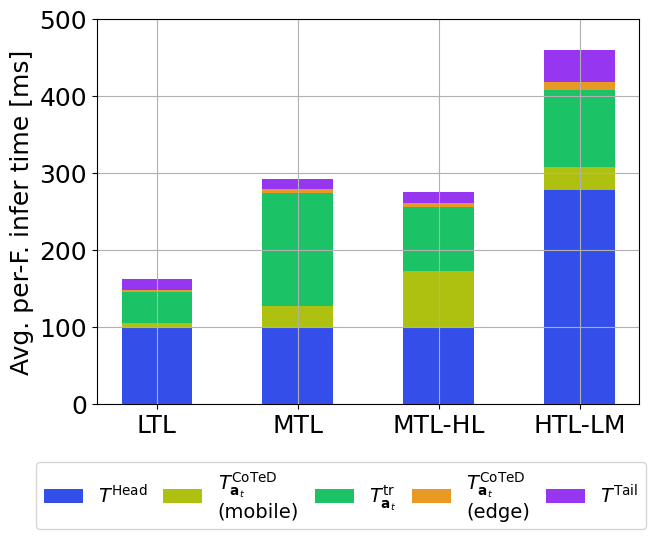

In [110]:
fig = plt.subplots(figsize=(7,5))
p1 = plt.bar(ind, dnn_mobile, width,color= plot_colors["dnn_mobile"] )
p2 = plt.bar(ind, coted_mobile, width, bottom = dnn_mobile,color= plot_colors["coted_mobile"])
p3 = plt.bar(ind, trans_time, width, bottom = coted_mobile+dnn_mobile,color= plot_colors["trans"])
p4 = plt.bar(ind, coted_edge, width, bottom = trans_time+coted_mobile+dnn_mobile,color= plot_colors["coted_edge"])
p5 = plt.bar(ind, dnn_edge, width, bottom = coted_edge+trans_time+coted_mobile+dnn_mobile,color= plot_colors["dnn_edge"])

plt.grid()
plt.ylim(0,500)
# plt.yscale("log")
plt.ylabel('Avg. per-F. infer time [ms]')
# plt.title('Contribution by the teams')
plt.xticks(ind, ('LTL', 'MTL', 'MTL-HL',"HTL-LM"))
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0], p3[0],p4[0],p5[0]),
           (r"$T^{\mathrm{Head}}$", r"$T^{\mathrm{CoTeD}}_{\mathbf{a}_t}$"+"\n(mobile)", r"$T^{\mathrm{tr}}_{\mathbf{a}_t}$",r"$T^{\mathrm{CoTeD}}_{\mathbf{a}_t}$"+"\n(edge)",r"$T^{\mathrm{Tail}}$"),
           ncol=5, loc='lower center', bbox_to_anchor=(0.45, -0.35),
           fontsize=14, columnspacing=0.8)


In [111]:
N = 6
ind = np.arange(N)   
width = 0.5 

In [112]:
dnn_mobile = np.array([
    ltl_time_mean["model_head_time"]*10,
    ltl_time_mean["model_head_time"]*10,
    mtl_time_mean["model_head_time"]*10, 
    mtlhl_time_mean["model_head_time"]*10,
    htllm_time_mean["model_head_time"]*10,
    htllm_time_mean["model_head_time"]*10
    ])
coted_mobile = np.array([
    0,
    ltl_time_mean["framework_head_time"]+ltl_time_mean["compression_time"],
    mtl_time_mean["framework_head_time"]+mtl_time_mean["compression_time"],
    mtlhl_time_mean["framework_head_time"]+mtlhl_time_mean["compression_time"],
    htllm_time_mean["framework_head_time"]+htllm_time_mean["compression_time"],
    0
    ])
trans_time = np.array([
    tiny_trans_df[200:400].mean()*1.4,
    ltl_time_mean["transmission_time"],
    mtl_time_mean["transmission_time"],
    mtlhl_time_mean["transmission_time"],
    htllm_time_mean["transmission_time"],
    full_trans_df[200:400].mean()
    ])

edge_scale = 50
coted_edge =np.array([
    0,
    ltl_time_mean["framework_tail_time"]+ltl_time_mean["decompression_time"]*edge_scale,
    mtl_time_mean["framework_tail_time"]+mtl_time_mean["decompression_time"]*edge_scale,
    mtlhl_time_mean["framework_tail_time"]+mtlhl_time_mean["decompression_time"]*edge_scale,
    htllm_time_mean["framework_tail_time"]+htllm_time_mean["decompression_time"]*edge_scale,
    0
    ])

tiny_sacle = 3
dnn_edge = np.array([
    ltl_time_mean["model_tail_time"]*tiny_sacle,
    ltl_time_mean["model_tail_time"]*tiny_sacle,
    mtl_time_mean["model_tail_time"]*tiny_sacle,
    mtlhl_time_mean["model_tail_time"]*tiny_sacle,
    htllm_time_mean["model_tail_time"],
    htllm_time_mean["model_tail_time"],
    ])

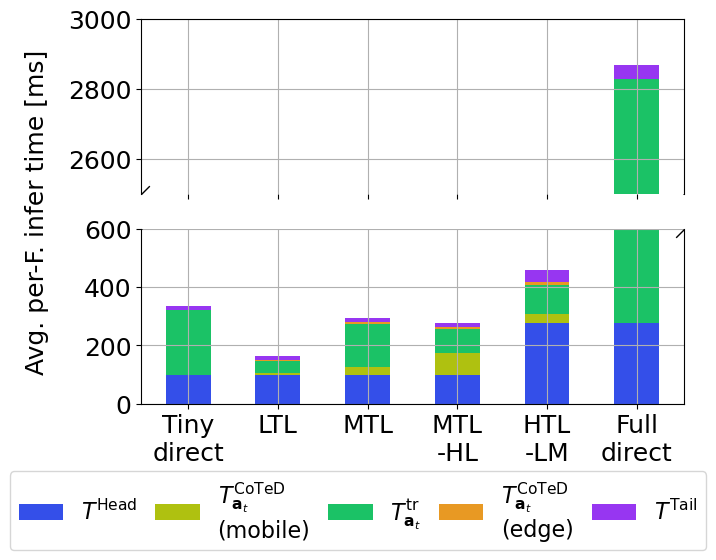

In [113]:
fig, (ax_high,ax_low) = plt.subplots(
    2, 1, sharex=True, figsize=(7, 5),
    gridspec_kw={'height_ratios': [1, 1]}
)

# Lower part (0–500)
p1 = ax_low.bar(ind, dnn_mobile, width,color= plot_colors["dnn_mobile"])
p2 = ax_low.bar(ind, coted_mobile, width, bottom = dnn_mobile,color =plot_colors["coted_mobile"])
p3 = ax_low.bar(ind, trans_time, width, bottom = coted_mobile+dnn_mobile, color= plot_colors["trans"])
p4 = ax_low.bar(ind, coted_edge, width, bottom = trans_time+coted_mobile+dnn_mobile,color=plot_colors["coted_edge"])
ax_low.bar(ind, dnn_edge, width, bottom = coted_edge+trans_time+coted_mobile+dnn_mobile,color=plot_colors["dnn_edge"])
ax_low.set_ylim(0, 600)

# Upper part (2500–3000)
ax_high.bar(ind, trans_time, width, bottom = coted_mobile+dnn_mobile, color= plot_colors["trans"])
p5 = ax_high.bar(ind, dnn_edge, width, bottom = coted_edge+trans_time+coted_mobile+dnn_mobile,color=plot_colors["dnn_edge"])
ax_high.set_ylim(2500, 3000)

# Hide the spines between the plots
ax_low.spines['top'].set_visible(False)
ax_high.spines['bottom'].set_visible(False)

# Add diagonal break marks
kwargs = dict(marker=[(-1, -1), (1, 1)],
              markersize=12, linestyle='none', color='k', mew=1)

ax_low.plot([0, 1], [1, 1], transform=ax_low.transAxes, **kwargs)
ax_high.plot([0, 1], [0, 0], transform=ax_high.transAxes, **kwargs)

ax_low.grid()
ax_high.grid()

ax_low.set_ylabel('Avg. per-F. infer time [ms]')
ax_low.yaxis.set_label_coords(-0.17, 1.1)
plt.xticks(ind, ('Tiny\ndirect','LTL', 'MTL', 'MTL\n-HL',"HTL\n-LM",'Full\ndirect'))
plt.legend((p1[0], p2[0], p3[0],p4[0],p5[0]),
           (r"$T^{\mathrm{Head}}$", r"$T^{\mathrm{CoTeD}}_{\mathbf{a}_t}$"+"\n(mobile)", r"$T^{\mathrm{tr}}_{\mathbf{a}_t}$",r"$T^{\mathrm{CoTeD}}_{\mathbf{a}_t}$"+"\n(edge)",r"$T^{\mathrm{Tail}}$"),
           ncol=5, loc='lower center', bbox_to_anchor=(0.4, -0.9),
           fontsize=16, columnspacing=0.8)